In [61]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

In [2]:
from platform import python_version

print(python_version())

3.9.12


In [62]:
scaler=StandardScaler()  # creating instance of StandardScaler

# Dataframe exploration analysis

In [63]:
data = pd.read_csv("C:/Users/secon/Desktop/Hackathon/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [65]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

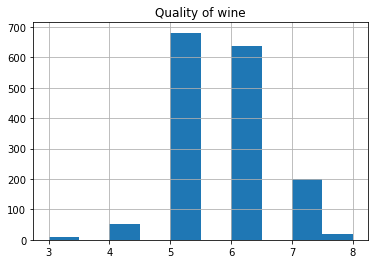

In [66]:
data['quality'].hist()
plt.title('Quality of wine')
plt.show()

In [67]:
quality = data["quality"].value_counts()

In [68]:
#pie chart for quality of wine

fig = go.Figure(data=[go.Pie(labels=quality.index, 
                             values = quality.values, 
                             textinfo = 'label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

# Setting good quality

In [69]:
# we decide that if quality > 5 it is a good wine
#qua = data['quality']>5
#qua

In [70]:
#y = data['quality'] = np.where(data['quality'] >= 5, 1, 0)

In [71]:
qua = np.array(data['quality']>5)
mapping = {True: 'Good wine', False: 'Bad wine'}
y = np.vectorize(mapping.get)(qua)

In [72]:
# Removing Target Variable (Quality)

X=data.iloc[:,:-1]

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Train and Test split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [74]:
scaler_X_train=scaler.fit_transform(X_train)

In [75]:
scaler_X_test=scaler.transform(X_test)

# Ensamble and Pipeline

In [76]:
ensamble = VotingClassifier(estimators=[
    ('mnb', MultinomialNB()),
    ('svc', SVC()),
    ('rf', RandomForestClassifier())
])

In [77]:
pipe = Pipeline([
    ('encoder', None), 
    ('classifier', ensamble),
])

# Gridsearch and Fit

In [78]:
cls = GridSearchCV(
    pipe, 
    {
        'encoder': [
            None,
        ],
        'classifier__mnb__alpha': [0.1, 1, 2],
        'classifier__svc__C': [0.1, 1, 10],
        'classifier__svc__class_weight': ['balanced'],
        'classifier__rf__n_estimators': [10, 100],
        'classifier__rf__criterion': ['gini', 'entropy'],
    }, 
    cv=5, 
    scoring='f1_macro'
)

In [79]:
cls.fit(X_train, y_train)
cls.best_params_

{'classifier__mnb__alpha': 2,
 'classifier__rf__criterion': 'gini',
 'classifier__rf__n_estimators': 100,
 'classifier__svc__C': 10,
 'classifier__svc__class_weight': 'balanced',
 'encoder': None}

In [80]:
cvvv = pd.DataFrame(cls.cv_results_)

In [81]:
cvvv['rank_test_score'].sort_values()

29     1
35     2
17     3
23     4
5      5
11     6
20     7
26     8
8      9
14    10
32    11
2     12
28    13
34    14
22    15
25    16
16    17
10    18
15    19
33    20
9     21
21    22
4     23
27    24
1     25
13    26
31    27
7     28
19    29
24    30
3     31
12    32
18    33
0     34
6     35
30    36
Name: rank_test_score, dtype: int32

In [82]:
cvvv.iloc[23]

mean_fit_time                                                                    0.29532
std_fit_time                                                                    0.057031
mean_score_time                                                                 0.041722
std_score_time                                                                  0.018946
param_classifier__mnb__alpha                                                           1
param_classifier__rf__criterion                                                  entropy
param_classifier__rf__n_estimators                                                   100
param_classifier__svc__C                                                              10
param_classifier__svc__class_weight                                             balanced
param_encoder                                                                       None
params                                 {'classifier__mnb__alpha': 1, 'classifier__rf_...
split0_test_score    

# Evaluation metrics

In [83]:
print('Validation score', cls.best_score_)
print('Test score', cls.score(X_test, y_test))

Validation score 0.7475158878618589
Test score 0.7770345596432553


# Save model

In [84]:
pickle.dump(cls, open('model.pkl', 'wb'))

# Building SVC classifier

In [58]:
from sklearn.svm import SVC

svc_clf = SVC(C=1.0, 
              kernel='rbf', 
              degree=3, 
              gamma='auto', 
              coef0=0.0, shrinking=True, 
              probability=False, 
              tol=0.001, cache_size=200, 
              class_weight=None, 
              verbose=False, max_iter=-1, 
              decision_function_shape='ovr', 
              break_ties=False,random_state=None)

svc_clf.fit(scaler_X_train,y_train)

SVC(gamma='auto')

In [59]:
svc_clf_predictions=svc_clf.predict(scaler_X_test)

In [60]:
c=confusion_matrix(y_test,svc_clf_predictions)
a=accuracy_score(y_test,svc_clf_predictions)
p=precision_score(y_test,svc_clf_predictions)
r=recall_score(y_test,svc_clf_predictions)

In [61]:
print('Confusion Matrix:\n',c)

Confusion Matrix:
 [[109  32]
 [ 41 138]]


In [62]:
print('Accuracy:',a*100)

Accuracy: 77.1875


In [63]:
print('Precision:',p*100)

Precision: 81.17647058823529


In [64]:
print('Recall:',r*100)

Recall: 77.09497206703911


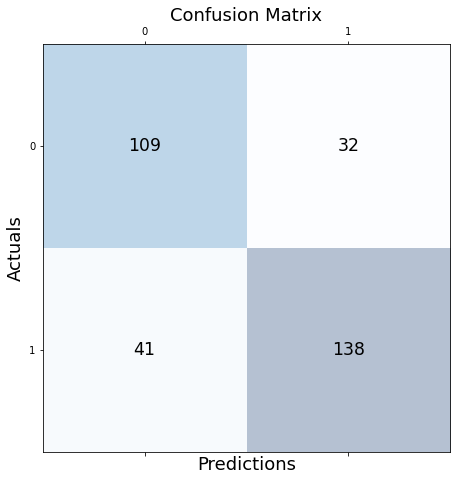

In [73]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(c, cmap=plt.cm.Blues, alpha=0.3)
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        ax.text(x=j, y=i,s=c[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Building random forest classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree

In [69]:
clf =RandomForestClassifier(n_estimators=800,max_features=4,random_state=42)
clf= clf.fit(X_train,y_train.ravel())
y_pred =clf.predict(X_test)
print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.784375


In [70]:
cm = confusion_matrix(y,clf.predict(X))

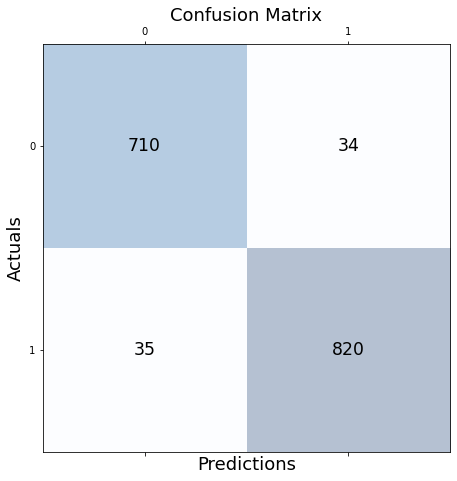

In [75]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()